# Mistral Large with v2.26 prompt

This notebook outlines the steps undertook to generate a prediction using Mistral Large with prompt from 2/26/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from new_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import mistral_instructions_v226
MODEL_ID = "mistral.mistral-large-2407-v1:0"
SYSTEM_PROMPT = mistral_instructions_v226

# Load the data

In [2]:
df = pd.read_csv("data/dataset_v1.csv")
len(df)

1084

In [3]:
df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,opinion_types,opinion_sources,cite_names,filename
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,['010combined'],['html_with_citations'],"['7 Wall. 700', 'White', 'Texas']",0001.91306_cites_88061.txt
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,['010combined'],['html_with_citations'],['21 Wall. 138'],0002.91306_cites_88994.txt
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,['010combined'],['html_with_citations'],['2 Wall. 110'],0003.91306_cites_87633.txt
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,['010combined'],['html_with_citations'],"['Texas', 'Hardenberg', '10 Wall. 68']",0004.91306_cites_88240.txt
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,['010combined'],['html_with_citations'],"['Texas', '16 Wall. 402']",0005.91306_cites_88693.txt


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 2
INFO:root:Completed: 1
INFO:root:Completed: 4
INFO:root:Completed: 3
INFO:root:Completed: 0
INFO:root:Completed: 5
INFO:root:Completed: 7
INFO:root:Completed: 6
INFO:root:Completed: 9
INFO:root:Completed: 8
INFO:root:Completed: 10
INFO:root:Completed: 12
INFO:root:Completed: 11
INFO:root:Completed: 13
INFO:root:Completed: 14
INFO:root:Completed: 15
INFO:root:Completed: 18
INFO:root:Completed: 17
INFO:root:Completed: 16
INFO:root:Completed: 19
INFO:root:Completed: 20
INFO:root:Completed: 22
INFO:root:Completed: 21
INFO:root:Completed: 23
INFO:root:Completed: 24
INFO:root:Completed: 25
INFO:root:Completed: 26
INFO:root:Completed: 27
INFO:root:Completed: 28
INFO:root:Completed: 29


CPU times: user 1min 11s, sys: 4.57 s, total: 1min 16s
Wall time: 20min 56s


[{'0003.91306_cites_87633.txt': {'model': 'mistral.mistral-large-2407-v1:0',
   'input_tokens': 3598,
   'output_tokens': 141,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The passage discusses the rules established in Murray v. Lardner and reaffirms them. There are no Explicit or Implicit Negative Actions indicating that the Acting Case overruled the Target Case. Instead, the Acting Case supports and applies the principles from the Target Case.',
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Murray v. Lardner',
   'raw_results': '```json\n{\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Murray v. Lardner",\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The passage discusses the rules established in Murray v. Lardner and reaffirms them. There are no Explicit or Implicit Negative Actions indicating that the Acting Case overruled the Target Case.

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,0003.91306_cites_87633.txt,mistral.mistral-large-2407-v1:0,3598.0,141.0,no,0.95,The passage discusses the rules established in...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
1,0002.91306_cites_88994.txt,mistral.mistral-large-2407-v1:0,4613.0,147.0,no,0.95,The passage discusses the Target Case but does...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co. (1875),"```json\n{\n ""instructions"": ""Determine wheth..."
2,0005.91306_cites_88693.txt,mistral.mistral-large-2407-v1:0,5175.0,153.0,no,0.90,"The passage discusses the Target Case, Hunting...",Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."
3,0004.91306_cites_88240.txt,mistral.mistral-large-2407-v1:0,5266.0,170.0,no,0.90,"The passage discusses the Target Case, Texas v...",Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,0001.91306_cites_88061.txt,mistral.mistral-large-2407-v1:0,6203.0,169.0,no,0.90,"The passage discusses the Target Case, Texas v...",Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/3.mistral/0.mistral_large_v226_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

54

In [8]:
retry = prediction_df[prediction_df["prediction"].isna()]
len(retry)

54

In [10]:
retry_filenames = retry["filename"].to_list()
retry = df[df["filename"].isin(retry_filenames)]
len(retry)

54

In [11]:
%%time
retry_predictions = predict(retry, MODEL_ID, SYSTEM_PROMPT)
retry_predictions[:2]

INFO:root:Completed: 769
INFO:root:Completed: 581
INFO:root:Completed: 738
INFO:root:Completed: 770
INFO:root:Completed: 737
INFO:root:Completed: 826
INFO:root:Completed: 931
INFO:root:Completed: 868
ERROR:root:JSON parsing error: Expecting ',' delimiter: line 1 column 363 (char 362). Response json str: {
  "instructions": "Determine whether the Acting Case overruled the Target Case.",
  "target_case": "Geer v. Connecticut",
  "overruled": "yes",
  "confidence": 0.95,
  "rationale": "The passage explicitly states that 'In expressly *951 overruling Geer three years ago, this Court traced the demise of the public ownership theory and definitively recast it as "`but a fiction expressive in legal shorthand of the importance to its people that a State have power to preserve and regulate the exploitation of an important resource.'" Hughes v. Oklahoma, 441 U.S. 322 , 334 (1979) (quoting Toomer v. Witsell, 334 U.S. 385 , 402 (1948)).' This indicates an Explicit Negative Action against the Targ

CPU times: user 3.62 s, sys: 264 ms, total: 3.89 s
Wall time: 1min 29s


[{'0770.109881_cites_108375.txt': {'model': 'mistral.mistral-large-2407-v1:0',
   'input_tokens': 4730,
   'output_tokens': 152,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The Acting Case discusses the Target Case but does not explicitly or implicitly overrule it. The passage mentions the Target Case in the context of discussing potential implications and analogies, but it does not take any Explicit or Implicit Negative Actions to reverse or overrule the Target Case.',
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Bivens v. Six Unknown Named Agents of Federal Bureau of Narcotics',
   'raw_results': '```json\n{\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Bivens v. Six Unknown Named Agents of Federal Bureau of Narcotics",\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The Acting Case discusses the Target Case but does not explicitly or impli

In [12]:
retry_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in retry_predictions 
    for filename, details in prediction.items()
])
retry_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,0770.109881_cites_108375.txt,mistral.mistral-large-2407-v1:0,4730,152,no,0.95,The Acting Case discusses the Target Case but ...,Determine whether the Acting Case overruled th...,Bivens v. Six Unknown Named Agents of Federal ...,"```json\n{\n ""instructions"": ""Determine wheth..."
1,0582.107973_cites_100520.txt,mistral.mistral-large-2407-v1:0,4519,154,no,0.95,The Acting Case discusses the Target Case and ...,Determine whether the Acting Case overruled th...,Westinghouse Electric & Manufacturing Co. v. F...,"```json\n{\n ""instructions"": ""Determine wheth..."
2,0739.109615_cites_104587.txt,mistral.mistral-large-2407-v1:0,3948,143,no,0.95,The passage discusses the Target Case but does...,Determine whether the Acting Case overruled th...,Memphis Natural Gas Co. v. Stone,"```json\n{\n ""instructions"": ""Determine wheth..."
3,0771.109881_cites_108913.txt,mistral.mistral-large-2407-v1:0,6405,154,no,0.95,The passages from the Acting Case mention the ...,Determine whether the Acting Case overruled th...,Cleveland Board of Education v. LaFleur,"```json\n{\n ""instructions"": ""Determine wheth..."
4,0738.109450_cites_108444.txt,mistral.mistral-large-2407-v1:0,6755,178,no,0.95,The Acting Case discusses the Target Case in t...,Determine whether the Acting Case overruled th...,"Dun & Bradstreet, Inc. v. C. R. Grove, Trustee...","```json\n{\n ""instructions"": ""Determine wheth..."


In [13]:
retry_df["prediction"].isna().sum()

5

In [14]:
comb_prediction_df = prediction_df.copy()
comb_prediction_df.set_index("filename", inplace=True)
retry_df.set_index("filename", inplace=True)
comb_prediction_df = comb_prediction_df.mask(comb_prediction_df['prediction'].isna(), retry_df)
comb_prediction_df.reset_index(inplace=True)

In [15]:
prediction_df = comb_prediction_df

In [16]:
prediction_df["prediction"].isna().sum()

5

In [17]:
prediction_df.to_csv("predictions/3.mistral/0.mistral_large_v226_prompt.csv", index=False)

In [18]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/3.mistral/0.mistral_large_v226_prompt.csv")

In [19]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [20]:
assert len(df) == len(prediction_df)

In [21]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,mistral.mistral-large-2407-v1:0,6203,169,no,0.90,"The passage discusses the Target Case, Texas v...",Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,mistral.mistral-large-2407-v1:0,4613,147,no,0.95,The passage discusses the Target Case but does...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co. (1875),"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,mistral.mistral-large-2407-v1:0,3598,141,no,0.95,The passage discusses the rules established in...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,mistral.mistral-large-2407-v1:0,5266,170,no,0.90,"The passage discusses the Target Case, Texas v...",Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,mistral.mistral-large-2407-v1:0,5175,153,no,0.90,"The passage discusses the Target Case, Hunting...",Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


# Run evaluation

In [22]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [23]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [24]:
eval_df["prediction"].value_counts()

prediction
no     941
yes    143
Name: count, dtype: int64

In [25]:
eval_df["input_tokens"].sum()

6756808

In [26]:
eval_df["output_tokens"].sum()

171521

In [27]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [28]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.96      0.97      0.97       935
         Yes       0.80      0.77      0.78       149

    accuracy                           0.94      1084
   macro avg       0.88      0.87      0.87      1084
weighted avg       0.94      0.94      0.94      1084



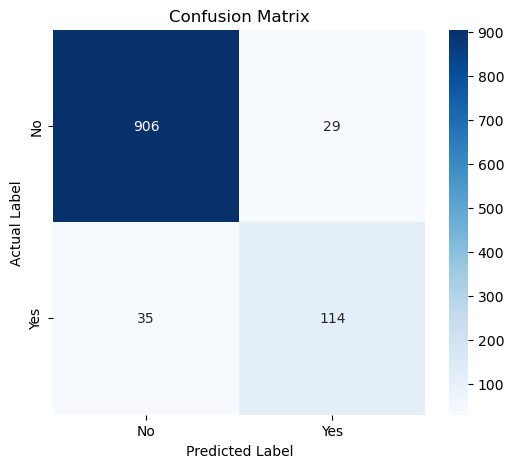

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [30]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.94
Precision: 0.80
Recall: 0.77
F-score: 0.78
Specificity: 0.97
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 114
True negatives: 906
False positives: 29
False negatives: 35


In [31]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

29

In [32]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

35

# Save the evaluation df

In [33]:
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,mistral.mistral-large-2407-v1:0,6203,169,no,0.90,"The passage discusses the Target Case, Texas v...",Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,mistral.mistral-large-2407-v1:0,4613,147,no,0.95,The passage discusses the Target Case but does...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co. (1875),"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,mistral.mistral-large-2407-v1:0,3598,141,no,0.95,The passage discusses the rules established in...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,mistral.mistral-large-2407-v1:0,5266,170,no,0.90,"The passage discusses the Target Case, Texas v...",Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,mistral.mistral-large-2407-v1:0,5175,153,no,0.90,"The passage discusses the Target Case, Hunting...",Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


In [34]:
eval_df.to_csv("predictions/3.mistral/0.mistral_large_v226_prompt_eval.csv", index=False)